# Anomaly Detection


In [ ]:
# load necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline
from scipy import stats

In [2]:
# load the server data
path = '...\ex8data1.mat'
serverdata = loadmat(path)
X = serverdata['X']
X.shape

(307, 2)

Text(0, 0.5, 'Throughput (mb/s)')

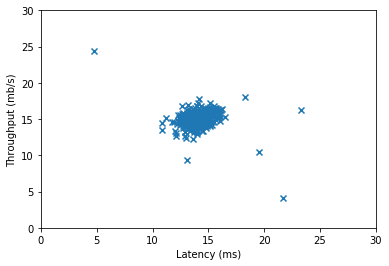

In [3]:
# data visualization
plt.scatter(X[:,0],X[:,1],marker="x")
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

The figure shows a tight cluster in the center a few values away from the cluster. These can be considered anomalies. To find out, we estimate a Gaussian distribution for each feature in the data. For that, we need mean and variance first.

In [4]:
# This function calculates the mean and variance of each feature in the data.
def estimate_gauss(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    return mu, sigma

mu, sigma = estimate_gauss(X)
mu, sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

Next we determine a probability threshold which indicates that an example should be considered an anomaly. For that we'll use labeled cross-validation data set. To do this, we need to use a set of labeled validation data and test the model's performance at identifying those anomalies with different threshold values.

In [5]:
# load cross-validation data 
Xval = serverdata['Xval']
yval = serverdata['yval']

Xval.shape, yval.shape

((307, 2), (307, 1))

In [41]:

def multivariateGaussian(X, mu, sigma):
    
    k = len(mu)
    
    sigma=np.diag(sigma)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
    return p

In [32]:
# Calculate probabilities for the unlabeled data
p = multivariateGaussian(X, mu, sigma)

In [33]:
# Calculate probabilities for the validation data
pval = multivariateGaussian(Xval, mu, sigma)

Now, we find the threshold values given the probability density values and true labels. To do this we calculate the F1 score for varying values of threshold.

In [36]:
def select_threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    
    step = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),step)
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        f1 = (2*prec*rec)/(prec+rec)
        
        if f1 > best_f1:
            best_f1 =f1
            best_epsilon = epi
        
    return best_epsilon, best_f1

epsilon, f1 = select_threshold(pval, yval)
epsilon, f1

C:\Users\Harveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


(8.990852779269496e-05, 0.8750000000000001)

In [37]:
# Now we can apply this function on our data to fing out outliers
outliers = np.where(p < epsilon)

Text(0, 0.5, 'Throughput (mb/s)')

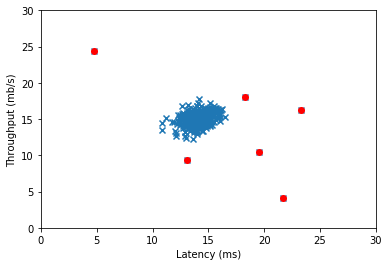

In [38]:
# visualize outliers
plt.scatter(X[:,0],X[:,1],marker="x")
plt.scatter(X[outliers[0],0], X[outliers[0],1], color = 'r', marker='o')
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

Now that we know how the model works, lets apply it on the multivariate data.


In [39]:
# load the training data
path = '...\ex8data2.mat'
serverdata2 = loadmat(path)
X_train = serverdata2['X']
X_train.shape

(1000, 11)

This data set contains 1000 server entries and 11 features.


In [40]:
mu_train, sigma_train = estimate_gauss(X_train)
mu_train, sigma_train

(array([  4.93940034,  -9.63726819,  13.81470749, -10.4644888 ,
         -7.95622922,  10.19950372,  -6.01940755,   7.96982896,
         -6.2531819 ,   2.32451289,   8.47372252]),
 array([60.97489373, 53.20572186, 58.51546272, 84.20403725, 65.26859177,
        89.57487757, 55.63349911, 87.16233783, 29.62926829, 70.7852052 ,
        50.50356719]))

In [42]:
# estimate probability for the training set
p_train = multivariateGaussian(X_train, mu_train, sigma_train)

In [43]:
X_val2 = serverdata2["Xval"]
y_val2 = serverdata2["yval"]

In [44]:
# estimate probability for the training set
p_val2 = multivariateGaussian(X_val2, mu_train, sigma_train)

In [45]:
# find the best threshold
epsilon2, f1_2 = select_threshold(p_val2, y_val2)
epsilon2, f1_2

C:\Users\Harveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


(1.377228890761358e-18, 0.6153846153846154)

In [46]:
outliers2 = np.where(p_train < epsilon2)

In [47]:
outliers2

(array([  9,  20,  21,  30,  39,  56,  62,  63,  69,  70,  77,  79,  86,
        103, 130, 147, 154, 166, 175, 176, 198, 209, 212, 218, 222, 227,
        229, 233, 244, 262, 266, 271, 276, 284, 285, 288, 289, 290, 297,
        303, 307, 308, 320, 324, 338, 341, 342, 344, 350, 351, 353, 365,
        369, 371, 378, 398, 407, 420, 421, 424, 429, 438, 452, 455, 456,
        462, 478, 497, 518, 527, 530, 539, 541, 551, 574, 583, 587, 602,
        613, 614, 628, 648, 674, 678, 682, 685, 700, 702, 705, 713, 721,
        741, 750, 757, 758, 787, 831, 834, 836, 839, 846, 870, 885, 887,
        890, 901, 911, 930, 939, 940, 943, 951, 952, 970, 975, 992, 996],
       dtype=int64),)

In [51]:
# Total no. of outliers
np.sum(p_train < epsilon2)

117

There are 117 anomalous servers in our data set.
F1 value can be further improved if we get a bigger data set.